In [1]:
!pip install pandas
!pip install numpy
!pip install seaborn
!pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.metrics import classification_report, confusion_matrix

In [3]:
data = pd.read_csv("C:/Users/Brand/Downloads/weatherHistory.csv")

In [4]:
data.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [5]:
data.tail()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
96448,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,Partly cloudy starting in the morning.
96449,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,Partly cloudy starting in the morning.
96450,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.
96451,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,Partly cloudy starting in the morning.
96452,2016-09-09 23:00:00.000 +0200,Partly Cloudy,rain,20.438889,20.438889,0.61,5.8765,39.0,15.5204,0.0,1016.16,Partly cloudy starting in the morning.


In [6]:
data.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


In [7]:
data.shape

(96453, 12)

In [8]:
data.nunique

<bound method DataFrame.nunique of                       Formatted Date        Summary Precip Type  \
0      2006-04-01 00:00:00.000 +0200  Partly Cloudy        rain   
1      2006-04-01 01:00:00.000 +0200  Partly Cloudy        rain   
2      2006-04-01 02:00:00.000 +0200  Mostly Cloudy        rain   
3      2006-04-01 03:00:00.000 +0200  Partly Cloudy        rain   
4      2006-04-01 04:00:00.000 +0200  Mostly Cloudy        rain   
...                              ...            ...         ...   
96448  2016-09-09 19:00:00.000 +0200  Partly Cloudy        rain   
96449  2016-09-09 20:00:00.000 +0200  Partly Cloudy        rain   
96450  2016-09-09 21:00:00.000 +0200  Partly Cloudy        rain   
96451  2016-09-09 22:00:00.000 +0200  Partly Cloudy        rain   
96452  2016-09-09 23:00:00.000 +0200  Partly Cloudy        rain   

       Temperature (C)  Apparent Temperature (C)  Humidity  Wind Speed (km/h)  \
0             9.472222                  7.388889      0.89            14.1197  

In [9]:
weather = data.drop(['Loud Cover'], axis = 1)

In [10]:
weather.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51,Partly cloudy throughout the day.


In [11]:
data_sample = data.sample (n=2000, random_state = 1)

In [12]:
data_sample.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
9597,2007-08-12 21:00:00.000 +0200,Mostly Cloudy,rain,18.938889,18.938889,0.84,7.7924,233.0,9.9820,0.0,1008.04,Partly cloudy throughout the day.
26204,2008-09-04 20:00:00.000 +0200,Partly Cloudy,rain,24.122222,24.122222,0.46,7.8568,209.0,10.3523,0.0,1012.41,Partly cloudy starting overnight continuing un...
6282,2006-05-26 19:00:00.000 +0200,Mostly Cloudy,rain,20.088889,20.088889,0.60,10.9480,346.0,9.9820,0.0,1019.48,Mostly cloudy throughout the day.
92330,2016-06-02 05:00:00.000 +0200,Overcast,rain,14.466667,14.466667,0.99,15.4077,291.0,6.8425,0.0,1011.14,Mostly cloudy throughout the day.
51067,2011-11-06 20:00:00.000 +0100,Mostly Cloudy,rain,9.716667,7.405556,0.67,16.4703,149.0,9.9015,0.0,1023.45,Mostly cloudy starting overnight continuing un...


In [13]:
print(data_sample.dtypes)

Formatted Date               object
Summary                      object
Precip Type                  object
Temperature (C)             float64
Apparent Temperature (C)    float64
Humidity                    float64
Wind Speed (km/h)           float64
Wind Bearing (degrees)      float64
Visibility (km)             float64
Loud Cover                  float64
Pressure (millibars)        float64
Daily Summary                object
dtype: object


C:\Users\Brand\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


Accuracy: 1.0
Confusion Matrix:
 [[400]]
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       400

    accuracy                           1.00       400
   macro avg       1.00      1.00      1.00       400
weighted avg       1.00      1.00      1.00       400



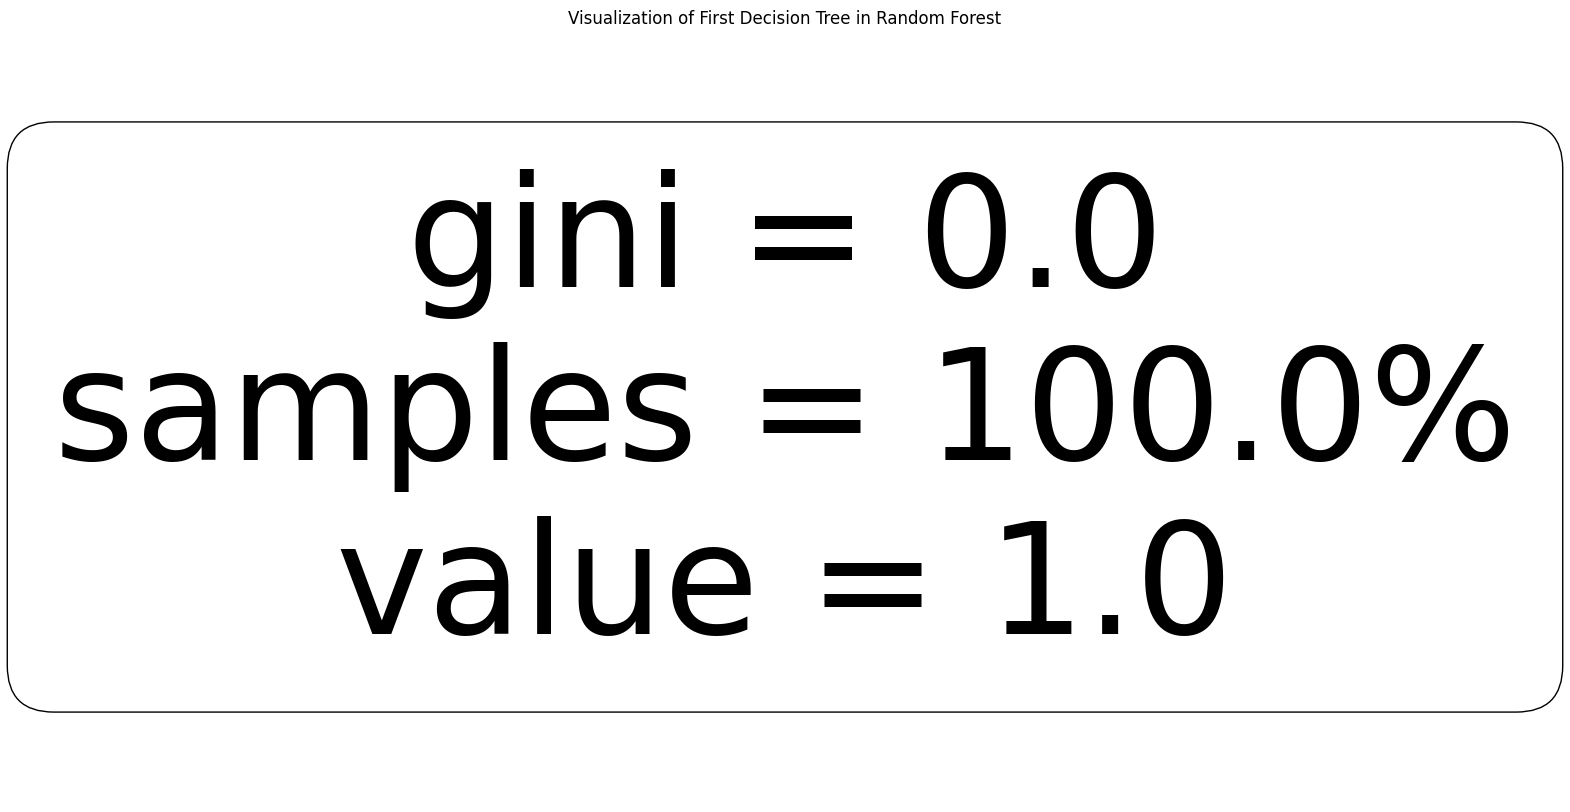

In [14]:
# Define X and y correctly
X = data_sample.drop(['Loud Cover', 'Apparent Temperature (C)', 'Formatted Date', 'Summary', 'Precip Type', 'Daily Summary'], axis = 1)
y = data_sample["Loud Cover"]

# Convert specific columns to numeric, coercing errors to NaN
data_sample['Temperature (C)'] = pd.to_numeric(data_sample['Temperature (C)'], errors='coerce')
data_sample['Humidity'] = pd.to_numeric(data_sample['Humidity'], errors='coerce')
data_sample['Wind Speed (km/h)'] = pd.to_numeric(data_sample['Wind Speed (km/h)'], errors='coerce')
data_sample['Apparent Temperature (C)'] = pd.to_numeric(data_sample['Apparent Temperature (C)'], errors='coerce')
data_sample['Wind Bearing (degrees)'] = pd.to_numeric(data_sample['Wind Bearing (degrees)'], errors='coerce')
data_sample['Visibility (km)'] = pd.to_numeric(data_sample['Visibility (km)'], errors='coerce')
data_sample['Loud Cover'] = pd.to_numeric(data_sample['Loud Cover'], errors='coerce')
data_sample['Pressure (millibars)'] = pd.to_numeric(data_sample['Pressure (millibars)'], errors='coerce')

# Drop rows with NaN values
data_sample = data_sample.dropna()

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_classifier.fit(X_train, y_train)

# Predict on test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

plt.figure(figsize=(20, 10))
plot_tree(rf_classifier.estimators_[0], filled=True, feature_names=X.columns, class_names=['Not Loud', 'Loud'], rounded=True, proportion=True)
plt.title("Visualization of First Decision Tree in Random Forest")
plt.show()

In [15]:
data_sample = data.drop(['Loud Cover', 'Apparent Temperature (C)', 'Formatted Date', 'Summary', 'Precip Type', 'Daily Summary'], axis = 1)

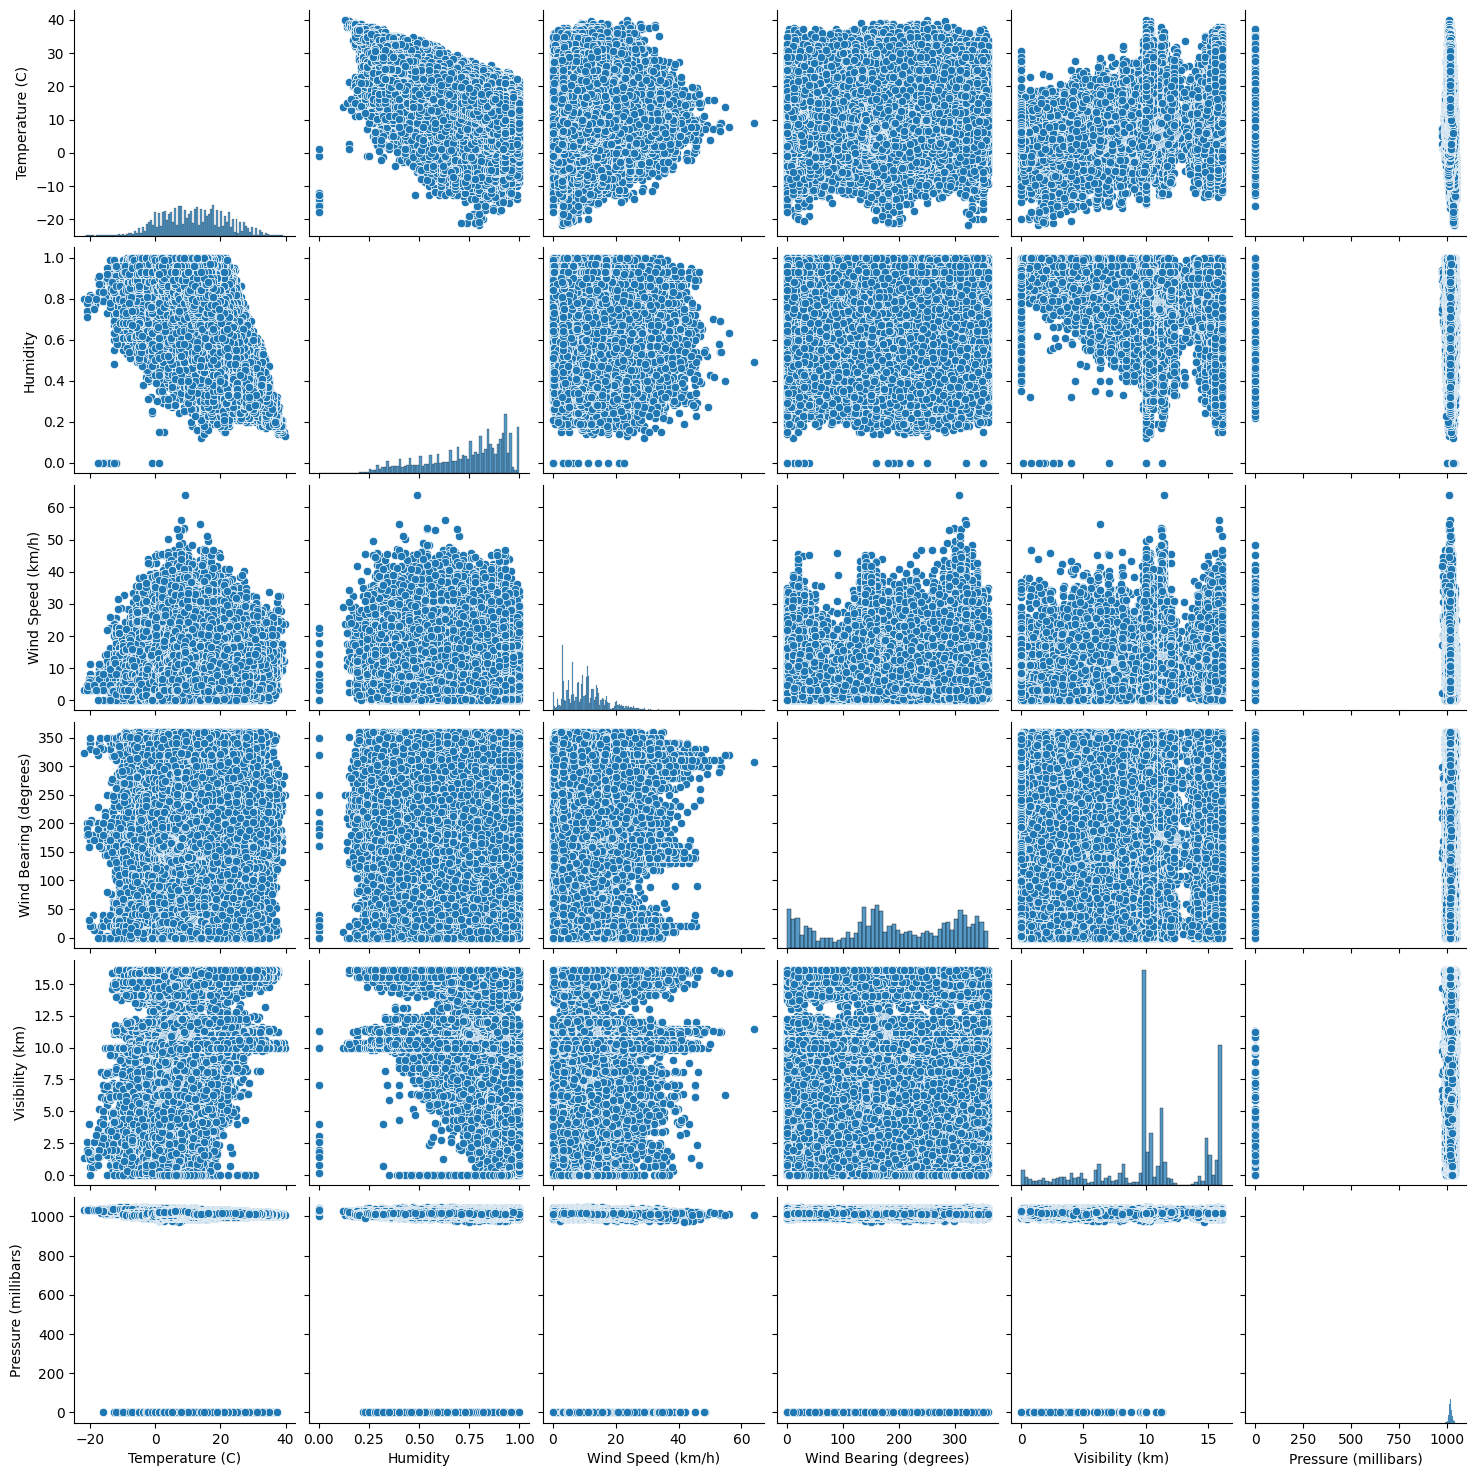

In [16]:
sns.pairplot(data_sample)

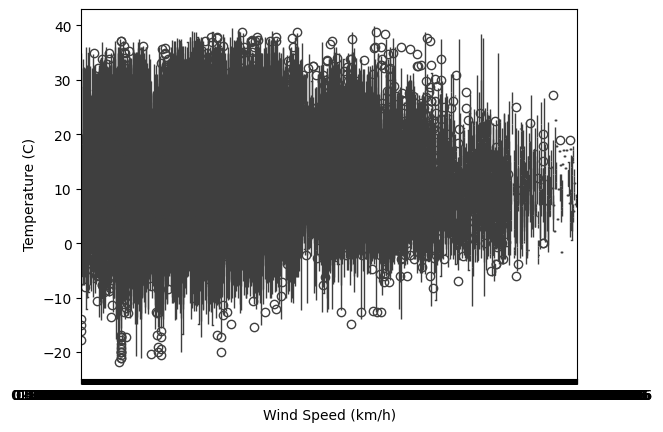

In [17]:
# Create a box plot
sns.boxplot(x='Wind Speed (km/h)', y='Temperature (C)', data=data)

# Display the plot
plt.show()

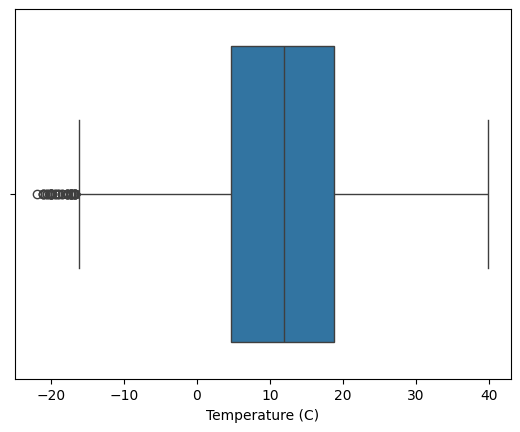

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Box plot to detect outliers in 'Temperature (C)' column
sns.boxplot(x=data_sample['Temperature (C)'])
plt.show()


In [19]:
column = 'Temperature (C)'

# Calculate Variance
variance = data_sample[column].var()
print(f"Variance: {variance}")

# Calculate Standard Deviation
std_dev = data_sample[column].std()
print(f"Standard Deviation: {std_dev}")

# Calculate Interquartile Range (IQR)
Q1 = data_sample[column].quantile(0.25)  # 25th percentile
Q3 = data_sample[column].quantile(0.75)  # 75th percentile
IQR = Q3 - Q1
print(f"Interquartile Range (IQR): {IQR}")

Variance: 91.2320371156568
Standard Deviation: 9.551546320657026
Interquartile Range (IQR): 14.150000000000002


In [20]:
data_sample.head()

,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
0,9.472222,0.89,14.1197,251.0,15.8263,1015.13
1,9.355556,0.86,14.2646,259.0,15.8263,1015.63
2,9.377778,0.89,3.9284,204.0,14.9569,1015.94
3,8.288889,0.83,14.1036,269.0,15.8263,1016.41
4,8.755556,0.83,11.0446,259.0,15.8263,1016.51


In [21]:
data_sample.describe()

,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000
mean,11.932678,0.734899,10.810640,187.509232,10.347325,1003.235956
std,9.551546,0.195473,6.913571,107.383428,4.192123,116.969906
min,-21.822222,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.688889,0.600000,5.828200,116.000000,8.339800,1011.900000
50%,12.000000,0.780000,9.965900,180.000000,10.046400,1016.450000
75%,18.838889,0.890000,14.135800,290.000000,14.812000,1021.090000
max,39.905556,1.000000,63.852600,359.000000,16.100000,1046.380000
